I have developed a model that predicts blood pressure conditions based on two input features: Systolic and Diastolic readings. To train this model, a demo dataset with three columns is used:

1. **Systolic** - the systolic blood pressure value
2. **Diastolic** - the diastolic blood pressure value
3. **Condition** - a categorical variable where:
   - 0 represents Low blood pressure
   - 1 represents Normal blood pressure
   - 2 represents High blood pressure

In [416]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder


Mounth Path

In [417]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [418]:
data = pd.read_csv('/content/Blood_Pressure_Data 2.csv')
print(data.head())


   Condition  Systolic  Diastolic
0          0        76         48
1          0        77         50
2          1       114         78
3          0        81         41
4          1        98         69


In [419]:
X = data[['Systolic', 'Diastolic']].values
y = data['Condition'].values


In [420]:
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

In [421]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Neural Network

In [422]:
class NeuralNetwork:
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayer1Neurons = 10
        hiddenLayer2Neurons = 10
        hiddenLayer3Neurons = 10
        outputLayerNeurons = 3

        self.learning_rate = 0.01

        self.W_H1 = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_H2 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_H3 = np.random.randn(hiddenLayer2Neurons, hiddenLayer3Neurons)
        self.W_OH = np.random.randn(hiddenLayer3Neurons, outputLayerNeurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_vals = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_vals / np.sum(exp_vals, axis=1, keepdims=True)

    def feedForward(self, X):
        self.hidden1_output = self.sigmoid(np.dot(X, self.W_H1))
        self.hidden2_output = self.sigmoid(np.dot(self.hidden1_output, self.W_H2))
        self.hidden3_output = self.sigmoid(np.dot(self.hidden2_output, self.W_H3))
        output_input = np.dot(self.hidden3_output, self.W_OH)
        pred = self.softmax(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error

        hidden3_error = output_delta.dot(self.W_OH.T)
        hidden3_delta = self.learning_rate * hidden3_error * self.sigmoid(self.hidden3_output, der=True)

        hidden2_error = hidden3_delta.dot(self.W_H3.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.sigmoid(self.hidden2_output, der=True)

        hidden1_error = hidden2_delta.dot(self.W_H2.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.sigmoid(self.hidden1_output, der=True)

        self.W_H1 += X.T.dot(hidden1_delta)
        self.W_H2 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_H3 += self.hidden2_output.T.dot(hidden3_delta)
        self.W_OH += self.hidden3_output.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)


Epoch: 0, error: 0.25350809516447925
Epoch: 200, error: 0.04419983520249879
Epoch: 400, error: 0.022805680417854482
Epoch: 600, error: 0.015439977710175565
Epoch: 800, error: 0.011851840491113536


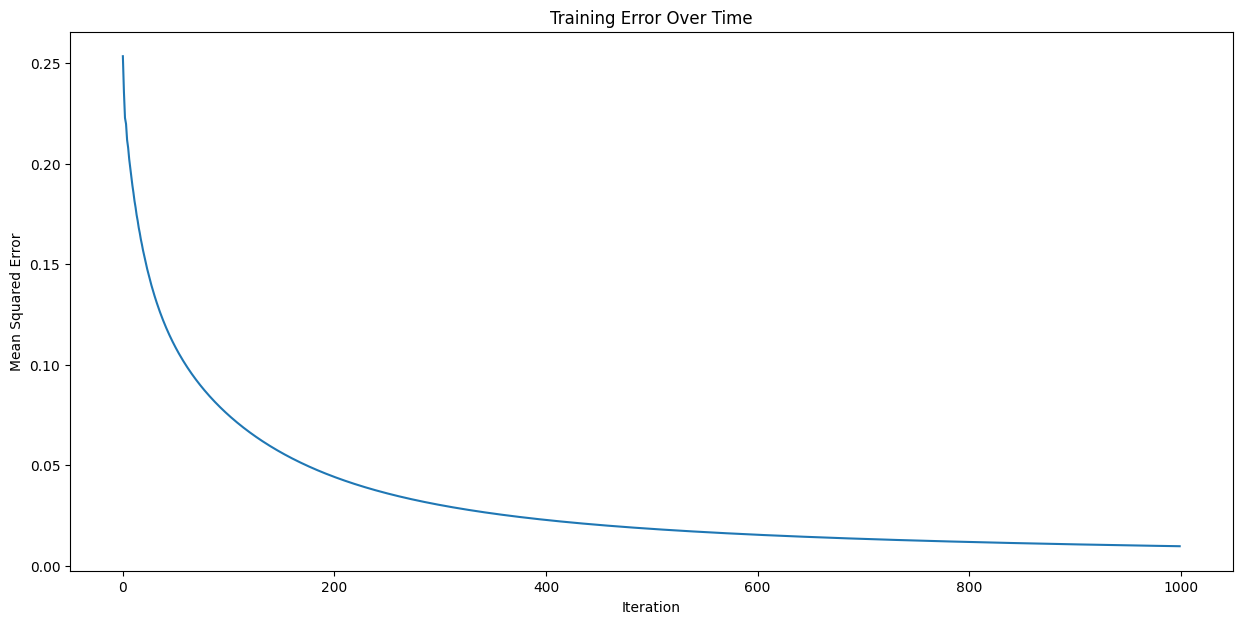

In [433]:
np.random.seed(48)

NN = NeuralNetwork()


err = []
for i in range(1000):
  NN.train(X_scaled, y)
  err.append(np.mean(np.square(y - NN.feedForward(X_scaled))))

  if i % 200 == 0:
    print(f'Epoch: {i}, error: {err[i]}')

plt.figure(figsize=(15, 7))
plt.plot(err)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Training Error Over Time')
plt.show()

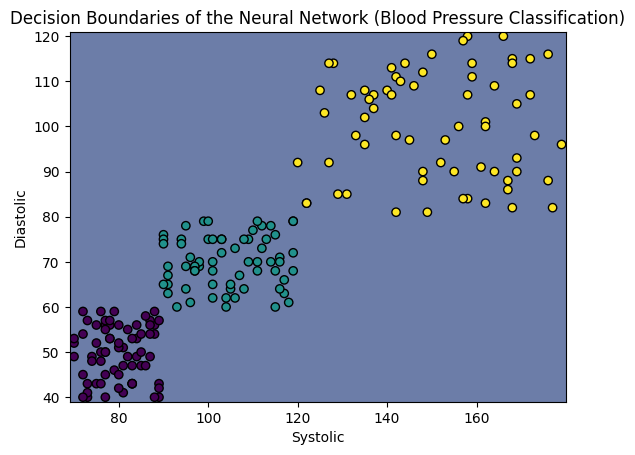

In [434]:
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = NN.feedForward(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)

Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.75, cmap="viridis")

plt.scatter(X[:, 0], X[:, 1], c=np.argmax(y, axis=1), cmap="viridis", edgecolor="k")

plt.xlabel('Systolic')
plt.ylabel('Diastolic')
plt.title("Decision Boundaries of the Neural Network (Blood Pressure Classification)")

plt.show()


In [435]:
print("Predictions (Probabilities):")
print(NN.feedForward(X))
print("Predicted Classes:")
print(np.argmax(NN.feedForward(X), axis=1))

fertilizer_types = ["Nitrogen-based", "Phosphorus-based", "Potassium-based"]
for i, prediction in enumerate(np.argmax(NN.feedForward(X), axis=1)):
    print(f"Sample {i + 1}: Predicted Fertilizer Type: {fertilizer_types[prediction]}")




Predictions (Probabilities):
[[1.92317541e-08 1.89477253e-02 9.81052255e-01]
 [1.92317586e-08 1.89477301e-02 9.81052251e-01]
 [1.92317588e-08 1.89477303e-02 9.81052250e-01]
 [8.48977637e-08 2.44753792e-02 9.75524536e-01]
 [1.92317588e-08 1.89477304e-02 9.81052250e-01]
 [1.92317588e-08 1.89477303e-02 9.81052250e-01]
 [1.92317565e-08 1.89477278e-02 9.81052253e-01]
 [1.92317588e-08 1.89477303e-02 9.81052250e-01]
 [2.13892656e-08 2.06247281e-02 9.79375250e-01]
 [1.92319460e-08 1.89478792e-02 9.81052102e-01]
 [1.92317588e-08 1.89477303e-02 9.81052250e-01]
 [1.92317588e-08 1.89477303e-02 9.81052250e-01]
 [8.98848268e-08 2.48250024e-02 9.75174908e-01]
 [4.98828361e-07 1.56650858e-01 8.43348643e-01]
 [1.92317586e-08 1.89477302e-02 9.81052251e-01]
 [1.93410764e-08 1.90345287e-02 9.80965452e-01]
 [1.92317588e-08 1.89477303e-02 9.81052250e-01]
 [1.92317592e-08 1.89477307e-02 9.81052250e-01]
 [1.92248321e-08 1.89401947e-02 9.81059786e-01]
 [1.92317588e-08 1.89477303e-02 9.81052250e-01]
 [9.1364979

Function to predict Condition based on user input

In [436]:
def predict_condition(systolic, diastolic):
    input_data = np.array([[systolic, diastolic]])

    scaler = StandardScaler().fit(X)
    input_scaled = scaler.transform(input_data)

    prediction = NN.feedForward(input_scaled)

    predicted_class = np.argmax(prediction)

    blood_pressure_conditions = ["Low Blood Pressure", "Normal Blood Pressure", "High Blood Pressure"]

    return blood_pressure_conditions[predicted_class]

systolic = float(input("Enter the systolic blood pressure: "))
diastolic = float(input("Enter the diastolic blood pressure: "))

predicted_condition = predict_condition(systolic, diastolic)
print(f"Predicted Condition: {predicted_condition}")


Enter the systolic blood pressure: 88
Enter the diastolic blood pressure: 56
Predicted Condition: Low Blood Pressure
